In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data File

In [230]:
# Mining Data
mining_df = pd.read_csv('../Output/industry/mining.csv')
# Drilling Data
drill_df = pd.read_csv('../Output/industry/drilling.csv')
# Arrival Data
arrive_df = pd.read_csv('../Output/industry/arrival.csv')
# Departure Data
depart_df = pd.read_csv('../Output/industry/departure.csv')
# C19 Quarterly Data
c19_q = pd.read_csv('../Output/industry/Q_C19_AU_2018_2021.csv')
# C19 Monthly Data
c19_m = pd.read_csv('../Output/industry/M_C19_AU_2018_2021.csv')


In [231]:
# convert quarterly data covid to suit mining and travel industries
# mining = 12 Q, travel = 13 Q
# c19_q_df = c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'AU', 'Quarter']]
c19_q_mining = c19_q_df.iloc[:12,:9]
c19_q_mining = c19_q_mining.set_index('Quarter')
c19_q_mining
# mining_df

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0
Q2_2019,0,0,0,0,0,0,0,0
Q3_2019,0,0,0,0,0,0,0,0
Q4_2019,0,0,0,0,0,0,0,0
Q1_2020,2032,917,743,337,364,69,17,4559


In [236]:
mining = mining_df.iloc[:,1:10]
mining = mining.set_index('Quarter')
mining.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,61.0,18.4,56.8,14.1,261.0,4.7,22.5,438.5
Q2_2018,68.5,24.5,70.3,19.7,349.8,6.7,28.3,567.8
Q3_2018,56.7,22.4,86.1,20.4,361.0,5.3,32.5,584.4
Q4_2018,61.2,28.3,90.3,21.9,346.3,4.8,39.9,592.7
Q1_2019,61.8,24.4,51.7,16.5,319.5,3.7,27.0,504.6


In [243]:
drill = drill_df.iloc[:,1:10]
drill = drill.set_index('Quarter')
drill

,Onshore,Offshore
Quarter,,
Q1_2018,76.6,106.7
Q2_2018,91.9,224.2
Q3_2018,99.7,208.2
Q4_2018,130.5,222.0
Q1_2019,94.1,128.4
Q2_2019,113.3,264.4
Q3_2019,148.7,221.7
Q4_2019,239.7,174.5
Q1_2020,132.6,108.9


In [242]:
c19_q_travel = c19_q_df.iloc[:13,:]
c19_q_travel = c19_q_travel.set_index('Quarter')
c19_q_travel

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0
Q2_2019,0,0,0,0,0,0,0,0
Q3_2019,0,0,0,0,0,0,0,0
Q4_2019,0,0,0,0,0,0,0,0
Q1_2020,2032,917,743,337,364,69,17,4559


In [250]:
arrive = arrive_df.iloc[:,1:]
arrive = arrive.set_index('Quarter')
arrive

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,2264540,1478110,1009060,139500,591850,9330,38810,13660,5545340
Q2_2018,1859650,1255830,892100,108610,500010,10,37590,11880,4665990
Q3_2018,2136460,1483730,1051700,139680,587500,0,42360,12170,5454430
Q4_2018,2219700,1497420,1001920,137420,576590,9670,40080,9890,5493170
Q1_2019,2286190,1582830,1017510,144390,585240,11710,37550,9320,5675200
Q2_2019,1930310,1343030,913030,121990,505380,3440,40430,9680,4867600
Q3_2019,2135730,1529090,1067850,161450,589630,0,51850,11390,5547530
Q4_2019,2197510,1532980,1043400,151130,604890,10270,49730,9490,5599880
Q1_2020,1843790,1306030,876930,131740,536100,15310,37340,6740,4754410


In [251]:
depart = depart_df.iloc[:,1:]
depart = depart.set_index('Quarter')
depart

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,2264540,1478110,1009060,139500,591850,9330,38810,13660,5545340
Q2_2018,1859650,1255830,892100,108610,500010,10,37590,11880,4665990
Q3_2018,2136460,1483730,1051700,139680,587500,0,42360,12170,5454430
Q4_2018,2219700,1497420,1001920,137420,576590,9670,40080,9890,5493170
Q1_2019,2286190,1582830,1017510,144390,585240,11710,37550,9320,5675200
Q2_2019,1930310,1343030,913030,121990,505380,3440,40430,9680,4867600
Q3_2019,2135730,1529090,1067850,161450,589630,0,51850,11390,5547530
Q4_2019,2197510,1532980,1043400,151130,604890,10270,49730,9490,5599880
Q1_2020,1843790,1306030,876930,131740,536100,15310,37340,6740,4754410


# Plot the data against COVID 19 Data

In [263]:
def mysubplot(x1_data,y1_data, y2_data, xlabel, y1_label, y2_label, xticklabel, xlim, fname):
    '''
    mysubplot is to plot 2 graphs with the same x-axis, in 2 y-axis.
    prefix - 1 is for the first data
    prefix - 2 is for the 2nd data
    xticklabel - is for labelling the x-axis
    xlim - is limitation for x-axis, for the following:
        11 - mining and petroleum
        12 - arrival and departure
    '''
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(x1_data, y1_data, color="red", marker="o")
    # set x-axis label
    ax.set_xlabel("Year",fontsize=14)
    # set y-axis label
    ax.set_ylabel(y1_label,color="red",fontsize=14)

    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(x1_data, y2_data,color="blue",marker="o")
    ax2.set_ylabel(y2_label,color="blue",fontsize=14)
    # ax.set_xticks(mining.index)
    ax.set_xticklabels(labels = xticklabel, rotation = 45)
    ax.grid(which='major')
    ax.set_xlim(0,xlim)
    plt.show()
    # save the plot as a file
    fig.savefig(f'../Output/industry/{fname}.png',
                format='png',
                dpi=100,
                bbox_inches='tight')

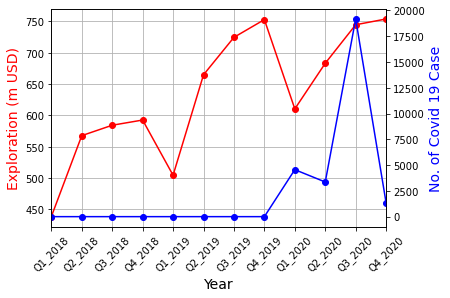

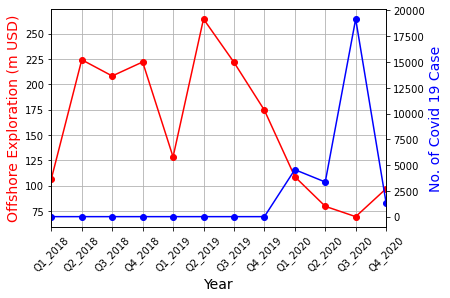

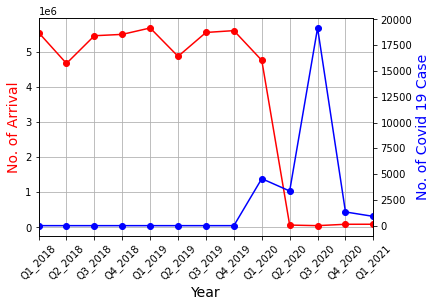

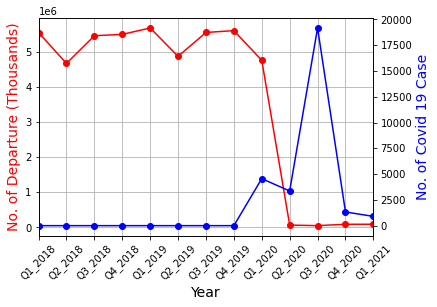

In [264]:
# Metric data
x1_data = [mining.index, drill.index, arrive.index, depart.index]
y1_data = [mining.AU, drill.Offshore, arrive.AU, depart.AU]
y2_data = [c19_q_mining.AU, c19_q_mining.AU, c19_q_travel.AU, c19_q_travel.AU]
xlabel = 'Year'
y1_label = ['Exploration (m USD)', 'Offshore Exploration (m USD)', 'No. of Arrival', 'No. of Departure (Thousands)']
y2_label = 'No. of Covid 19 Case'
fname = ['mining', 'drilling', 'arrival', 'departure']
xticklabel = [mining.index, mining.index, arrive.index, arrive.index]
xlim = [11,11,12,12]

for i in range(len(x1_data)):
    mysubplot(x1_data[i], y1_data[i], y2_data[i], xlabel, y1_label[i], y2_label, xticklabel[i], xlim[i], fname[i])

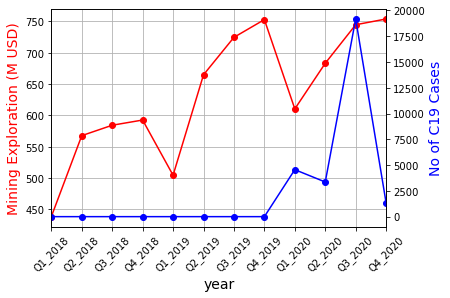

In [258]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(mining.index, mining.AU, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Mining Exploration (M USD)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(c19_q_mining.index, c19_q_mining.AU,color="blue",marker="o")
ax2.set_ylabel("No of C19 Cases",color="blue",fontsize=14)
ax.set_xticks(mining.index)
ax.set_xticklabels(labels = mining.index, rotation = 45)
ax.grid(which='major')
ax.set_xlim(0,11)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [229]:
# def myplot(data, xlabel,ylabel,xticker):
#     ''' To plot graph '''
#     ax = data.plot()
#     ax.set_xticks(data.index)
#     ax.set_xticklabels(xticker, rotation = 45)
#     ax.grid(which='major')
#     ax.set_xlim(0,11)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)






,NSW,VIC,QLD,SA,WA,TAS,NT,AU,Quarter
0,61.0,18.4,56.8,14.1,261.0,4.7,22.5,438.5,Q1_2018
1,68.5,24.5,70.3,19.7,349.8,6.7,28.3,567.8,Q2_2018
2,56.7,22.4,86.1,20.4,361.0,5.3,32.5,584.4,Q3_2018
3,61.2,28.3,90.3,21.9,346.3,4.8,39.9,592.7,Q4_2018
4,61.8,24.4,51.7,16.5,319.5,3.7,27.0,504.6,Q1_2019
5,72.6,27.2,85.3,26.6,415.1,5.6,32.5,664.9,Q2_2019
6,72.5,26.5,107.6,18.6,459.7,3.4,36.4,724.7,Q3_2019
7,89.5,34.7,109.4,25.4,453.9,3.3,36.8,753.0,Q4_2019
8,77.2,35.6,81.2,21.7,367.1,2.3,25.4,610.5,Q1_2020
9,80.0,39.7,105.2,19.6,412.4,2.0,24.4,683.3,Q2_2020


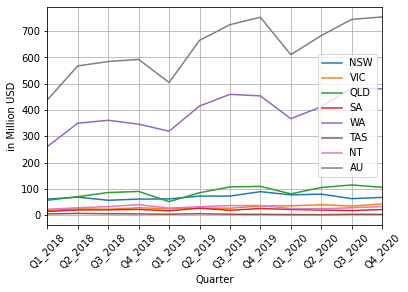

In [202]:
mining = mining_df.iloc[:,1:]
# mining.set_index('Quarter')

# ax = mining.plot()
# ax.
# plt.xticklabel(mining.index, rot = 90)
# mining

myplot(mining, 'Quarter', 'in Million USD', mining.Quarter)
# ax = mining.plot()
# ax.set_xticklabels(mining.Quarter, rotation = 90)
# ax.grid(which = 'minor')

mining
# myplot()

In [203]:
# Check Length
# c19_q.columns
# Remove last row and first column

c19_q_df = c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'AU', 'Quarter']]c19_q_df.head()

myplot(c19_q_df,'Quarter','No. of Cases', c19_q_df.Quarter)

SyntaxError: invalid syntax (<ipython-input-203-2ef1a093a799>, line 5)

In [170]:
# c19_q_df = c19_q_df.set_index('Quartal')
# c19_q_df.head()

In [178]:
# xticker = ['Q1','Q2','Q3','Q4', 'Q1','Q2','Q3','Q4', 'Q1']
# ax = c19_q_df.plot()
# ax.set_xticklabels(xticker, rotation=90)
# ax.grid(which = 'major')

#  ax.set_xticklabels(df.C, rotation=90)
mm = c19_q_df.iloc[:12,:8]

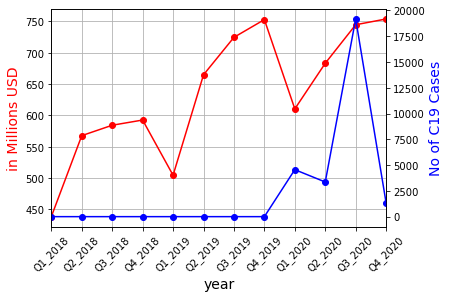

In [189]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(mining.index, mining.AU, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("in Millions USD",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(mm.index, mm.AU,color="blue",marker="o")
ax2.set_ylabel("No of C19 Cases",color="blue",fontsize=14)
ax.set_xticks(mining.index)
ax.set_xticklabels(mining.Quarter, rotation = 45)
ax.grid(which='major')
ax.set_xlim(0,11)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')